In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.legendre as L #using the numpy module to generate the legendre polynomials
from scipy.stats import beta
from helpers_1 import *

### Crude MonteCarlo estimator

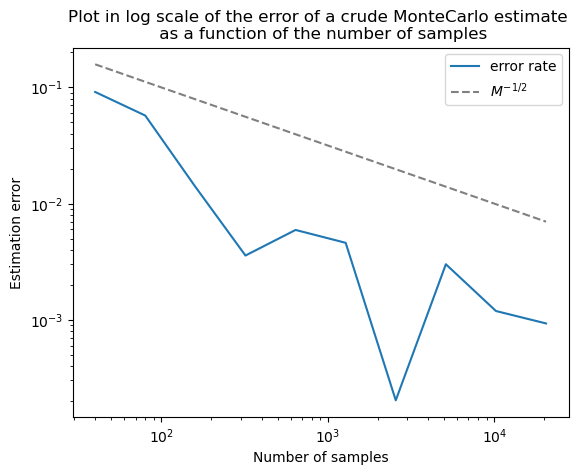

In [2]:
seed=9001 #for reproducibility

M_array= np.array([20*2**i for i in range(1,11)]) #the number of samples we'll use in order crude Monte Carlo

error_function=np.array([Monte_Carlo(m, f, seed) for m in M_array])

plt.loglog(M_array, error_function, label='error rate') #plot in logscale of the error
plt.loglog(M_array, M_array**-0.5, '--', label = r'$M^{-1/2}$',color='gray') #the upper bound theoretical M^{1/2} convergence rate
plt.title("Plot in log scale of the error of a crude MonteCarlo estimate \n as a function of the number of samples")
plt.xlabel("Number of samples")
plt.ylabel("Estimation error")
plt.legend()
plt.savefig("Figures/MC_crude.png")
plt.show()

### Least square Monte Carlo estimator

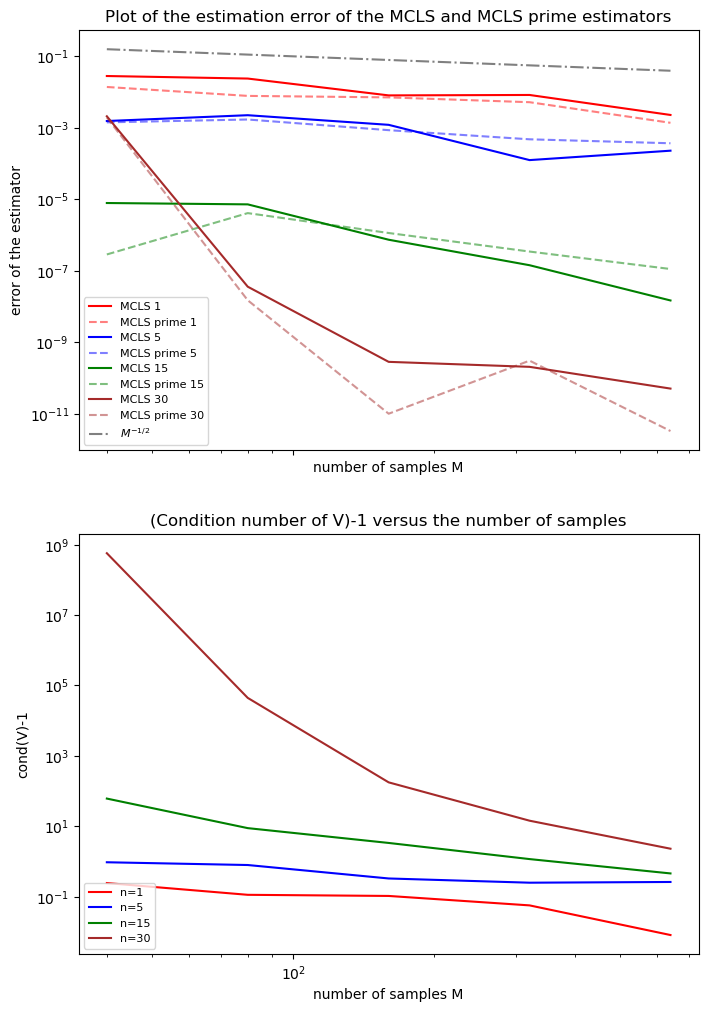

In [3]:
#all estimators have the same seed so that their performance doesn't depend on the sample drawn

fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[1,5, 15, 30]
M_array=np.array([20*2**i for i in range(1,6)]) 

seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['red','blue', 'green', 'brown'] 

for i, n in enumerate(N):
    error_function_IMCLS=[] #error of the MCLS estimator
    error_function_IMCLS_prime=[] #error of the MCLS prime estimator
    cond_V=[] #value of the condition number of the coefficient matrix in the least square problem
    
    for m in M_array:
        e_IMCLS, e_IMCLS_prime, c_v=IMCLS(m, n, seed_1, seed_2)
        cond_V.append(c_v-1) #well conditioned system has condition in O(1) so we will plot condition_number-1
        error_function_IMCLS.append(e_IMCLS)
        error_function_IMCLS_prime.append(e_IMCLS_prime)
           
    sbplt_0.loglog(M_array,error_function_IMCLS, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Plot of the estimation error of the MCLS and MCLS prime estimators")
    sbplt_1.set_title("(Condition number of V)-1 versus the number of samples")

#ploting O(M^{-1/2}) the theoretical convergence upper bound of a crude Monte Carlo estimator
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("(Condition number of V)-1 versus the number of samples")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/MCLS_and_prime.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_number.png", bbox_inches=extent_1.expanded(1.3, 1.12))

40  doing with n depending on M
80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M


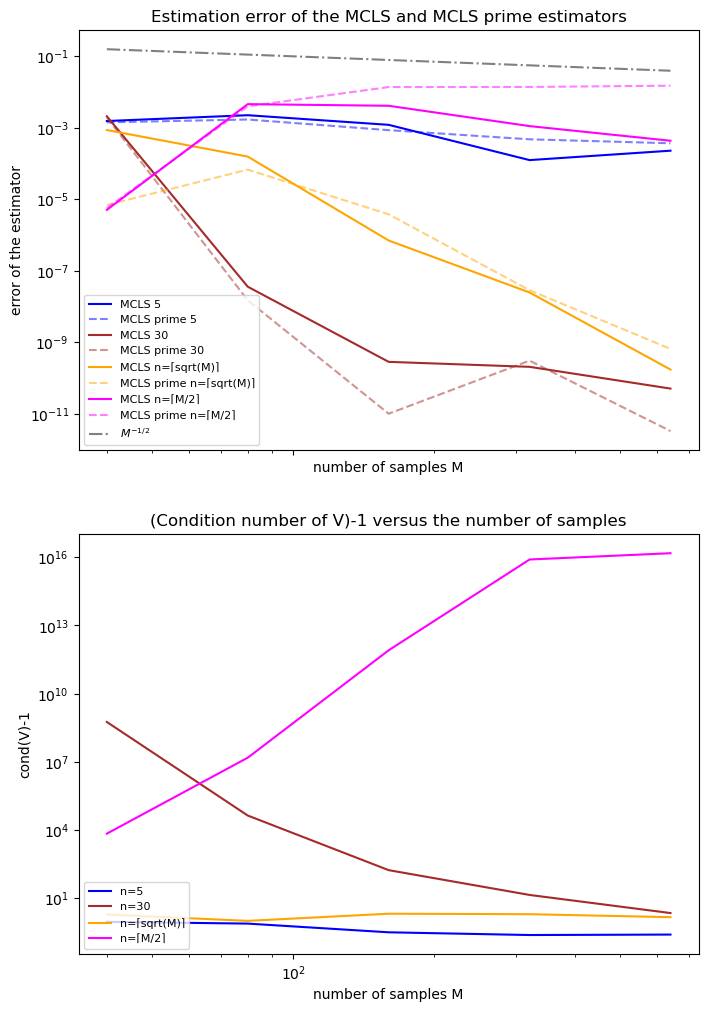

In [4]:
fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[5, 30] #for reference/comparison to ⌈sqrt(M)⌉ and n=⌈M/2⌉
M_array=np.array([20*2**i for i in range(1,6)]) 

seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['blue', 'brown']

for i, n in enumerate(N):
    error_function_IMCLS=[]
    error_function_IMCLS_prime=[]
    cond_V=[]
    
    for m in M_array:
        e_IMCLS, e_IMCLS_prime, c_v=IMCLS(m, n, seed_1, seed_2)
        cond_V.append(c_v-1)
        error_function_IMCLS.append(e_IMCLS)
        error_function_IMCLS_prime.append(e_IMCLS_prime)
  
    sbplt_0.loglog(M_array,error_function_IMCLS, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Estimation error of the MCLS and MCLS prime estimators")
    sbplt_1.set_title("(Condition number of V)-1 versus the number of samples")
    

#plotting the error of the MCLS and MCLS prime estimators for values of n varying with the sample size M
#for n=⌈sqrt(M)⌉ and n=⌈M/2⌉

N_func_1=lambda m: int(np.ceil(np.sqrt(m)))
N_func_2=lambda m: int(np.ceil(m/2))
err_sqrt_M=[]
err_sqrt_M_prime=[]
err_M_2=[]
err_M_2_prime=[]
cond_V_sqrt_M=[]
cond_V_M_2=[]

for m in M_array:
    e_sqrt_M, e_sqrt_M_prime, c_v_sqrt_M=IMCLS(m, N_func_1(m), seed_1, seed_2)
    
    e_M_2, e_M_2_prime, c_v_M_2=IMCLS(m, N_func_2(m), seed_1, seed_2)
    
    #storing the error of the estimators
    err_sqrt_M.append(e_sqrt_M)
    err_sqrt_M_prime.append(e_sqrt_M_prime)
    err_M_2.append(e_M_2)
    err_M_2_prime.append(e_M_2_prime)
    
    #storing the condition number -1 of the coefficient matrix of the least square problem
    cond_V_sqrt_M.append(c_v_sqrt_M-1)
    cond_V_M_2.append(c_v_M_2-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_sqrt_M, color="orange", label='MCLS n=⌈sqrt(M)⌉')
sbplt_0.loglog(M_array, err_sqrt_M_prime, color="orange", linestyle='--', alpha=0.5, label='MCLS prime n=⌈sqrt(M)⌉')
sbplt_0.loglog(M_array, err_M_2, color="magenta", label='MCLS n=⌈M/2⌉')
sbplt_0.loglog(M_array, err_M_2_prime, color="magenta", linestyle='--', alpha=0.5, label='MCLS prime n=⌈M/2⌉')
sbplt_1.loglog(M_array, cond_V_sqrt_M, color="orange", label="n=⌈sqrt(M)⌉")
sbplt_1.loglog(M_array, cond_V_M_2, color="magenta", label="n=⌈M/2⌉")

#ploting O(M^{-1/2}) the theoretical convergence upper bound of the crude Monte Carlo estimator
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("(Condition number of V)-1 versus the number of samples")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/MCLS_and_prime_fun_n.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_number_fun_n.png", bbox_inches=extent_1.expanded(1.3, 1.12))

### Monte Carlo estimator with least square and importance sampling

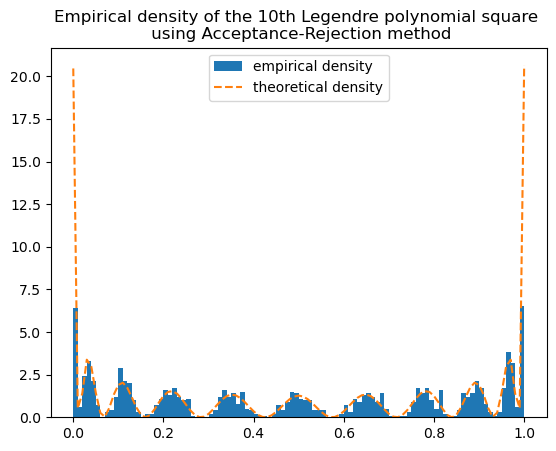

In [5]:
#histogram comparing the theoretical distribution of the 10th Legendre polynomial to its empirical one
index=10
M=1000
seed=9119

Y=[gen_from_l_2(index, m)[0] for m in range(M)]

_, bins, _=plt.hist(Y, density=True, bins=100, label="empirical density")
plt.plot(bins, l_2(bins, index), '--', label="theoretical density")
plt.title("Empirical density of the 10th Legendre polynomial square \n using Acceptance-Rejection method")
plt.legend()
plt.savefig("Figures/empirical_distribution_legendre_square.png")
plt.show()

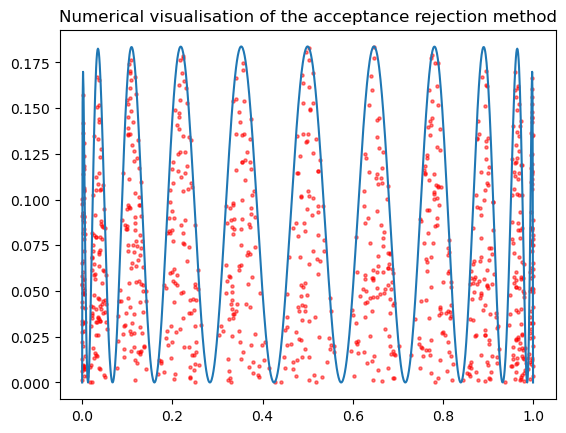

In [6]:
#numerically checking the values (Y, V) are correctly distributed where (Y, V) is the pair output by the acceptance-rejection
#method
index=10 
M=1000
x=np.linspace(0,1,1000)
a=1/2

up_bound=4*np.exp(1)

l_2_list=l_2(x, index)/(up_bound*beta.pdf(x, a,a))

gen_list=[gen_from_l_2(index, m) for m in range(M)]

Y=[value[0] for value in gen_list]
V=[value[1] for value in gen_list]

plt.plot(x, l_2_list)
plt.scatter(Y, V, alpha=0.5, s=5, color='red')
plt.title("Numerical visualisation of the acceptance rejection method")
plt.show()

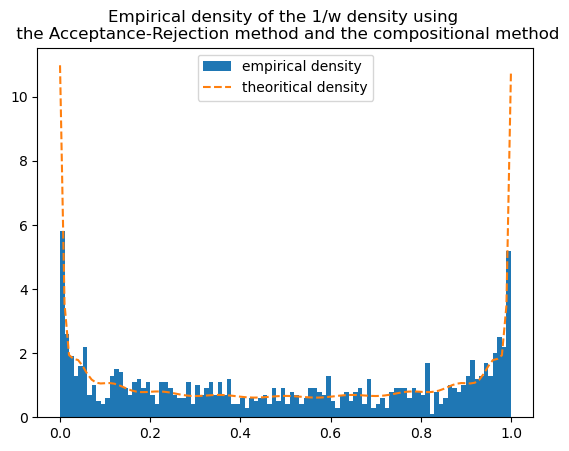

In [7]:
#histogram comparing the theoretical distribution of the 1/w density to its empirical one
N=10
M=1000
seed=9119

Y=gen_from_w(N, M, seed)

_, bins, _=plt.hist(Y, density=True, bins=100, label="empirical density")
plt.plot(bins, pdf_1_w(bins, N), '--', label="theoritical density")
plt.legend()
plt.title("Empirical density of the 1/w density using \n the Acceptance-Rejection method and the compositional method")
plt.savefig("Figures/empirical_distribution_1_w.png")
plt.show()

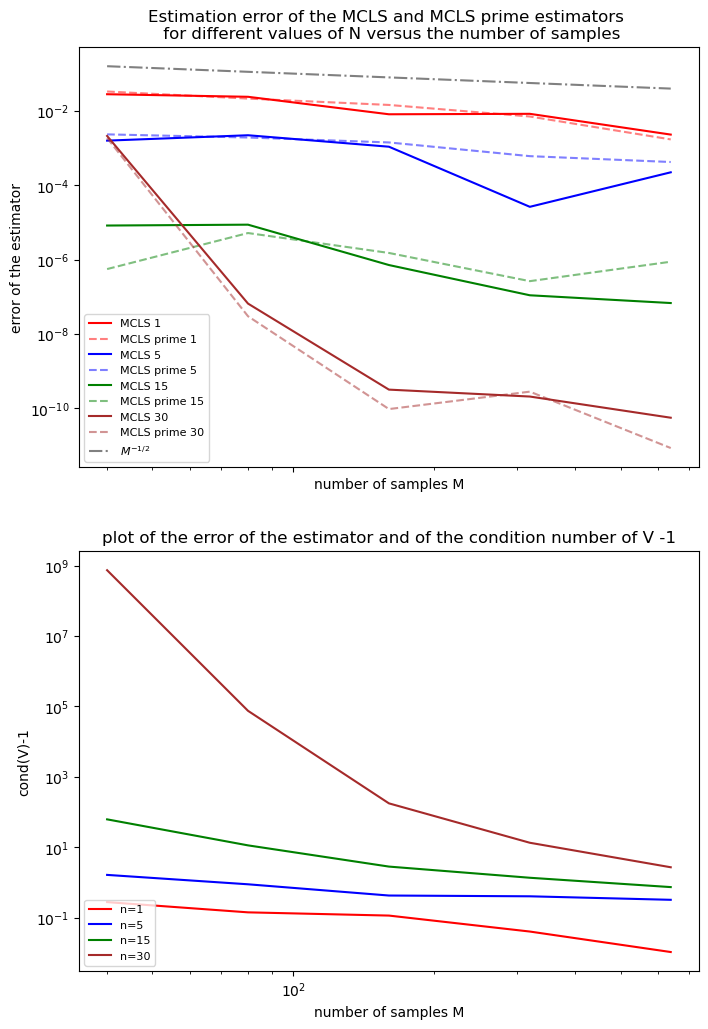

In [8]:
#plot of the MCLS and MCLS prime estimators with importance sampling

#all estimators have the same seed so that their performance doesn't depend on the sample drawn

fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[1,5, 15, 30]
M_array=np.array([20*2**i for i in range(1,6)])
seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['red','blue', 'green', 'brown'] 

for i, n in enumerate(N):
    error_function_IMCLS_importance=[]
    error_function_IMCLS_importance_prime=[]
    cond_V_tilde=[]
    
    for m in M_array:
        e_IMCLS_importance, e_IMCLS_importance_prime, c_v_tilde=IMCLS_importance(m, n, seed_1, seed_2)
        cond_V_tilde.append(c_v_tilde-1)
        error_function_IMCLS_importance.append(e_IMCLS_importance)
        error_function_IMCLS_importance_prime.append(e_IMCLS_importance_prime)
           
    sbplt_0.loglog(M_array,error_function_IMCLS_importance, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_importance_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V_tilde, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Estimation error of the MCLS and MCLS prime estimators \n for different values of N versus the number of samples")
    sbplt_1.set_title("Condition number of V -1 versus the number of samples")

#plotting O(M^{-1/2})
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("plot of the error of the estimator and of the condition number of V -1")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/MCLS_and_prime_importance.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_number_importance.png", bbox_inches=extent_1.expanded(1.3, 1.12))

finished with reference plots
40  doing with n depending on M
80  doing with n depending on M
160  doing with n depending on M
320  doing with n depending on M
640  doing with n depending on M


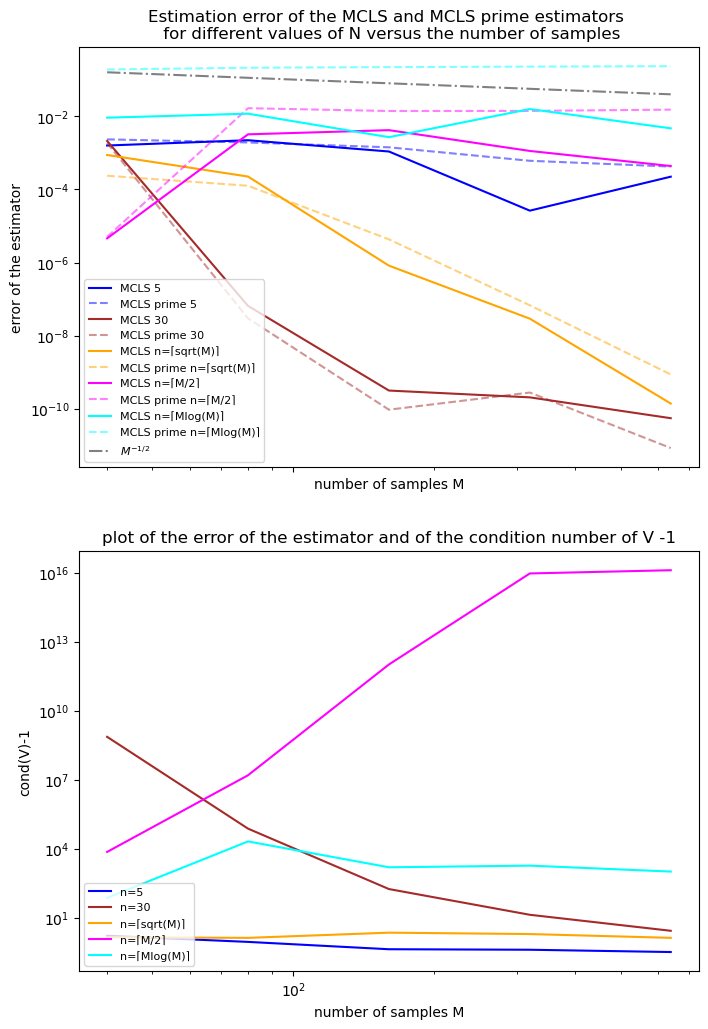

In [9]:
#plot of the MCLS and MCLS prime estimators with importance sampling with the number of Legendre polynomials considered
#depending on the number of samples

fig, ax = plt.subplots(2,figsize= (8,12), sharey = False, sharex = True)

N=[5, 30] #for reference/comparison to the behaviour of ⌈sqrt(M)⌉, ⌈M/2⌉ and ⌈Mlog(M)⌉
M_array=np.array([20*2**i for i in range(1,6)]) 

seed_1=9009
seed_2=1991

sbplt_0 = ax[0] #plot of the estimators
sbplt_1 = ax[1] #plot of the condition number
c=['blue', 'brown']

for i, n in enumerate(N):
    error_function_IMCLS_importance=[]
    error_function_IMCLS_importance_prime=[]
    cond_V_tilde=[]
    
    for m in M_array:
        e_IMCLS_importance, e_IMCLS_importance_prime, c_v_tilde=IMCLS_importance(m, n, seed_1, seed_2)
        cond_V_tilde.append(c_v_tilde-1)
        error_function_IMCLS_importance.append(e_IMCLS_importance)
        error_function_IMCLS_importance_prime.append(e_IMCLS_importance_prime)
  
    sbplt_0.loglog(M_array,error_function_IMCLS_importance, color=c[i], label="MCLS "+str(n))
    sbplt_0.loglog(M_array,error_function_IMCLS_importance_prime, alpha=0.5, color=c[i], linestyle='--', label="MCLS prime "+str(n))
    sbplt_1.loglog(M_array, cond_V_tilde, color=c[i], label='n='+str(n))
    sbplt_0.set_title("Estimation error of the MCLS and MCLS prime estimators \n for different values of N versus the number of samples")
    sbplt_1.set_title("(Condition number of V)-1 versus the number of samples")

print("finished with reference plots")

#plotting the estimation error for n=⌈sqrt(M)⌉ and n=⌈M/2⌉ and n=⌈Mlog(M)⌉

#functions of the number of legendre polynomials, depending on the number of samples
N_func_1=lambda m: int(np.ceil(np.sqrt(m)))
N_func_2=lambda m: int(np.ceil(m/2))
N_func_3=lambda m: int(np.ceil(m*np.log(m))) #the natural logarithm

#storing the approximation error of the estimators wrt the number of samples
err_sqrt_M_importance=[]
err_sqrt_M_importance_prime=[]
err_M_2_importance=[]
err_M_2_importance_prime=[]
err_M_log_M_importance=[]
err_M_log_M_importance_prime=[]

#storing the condition number -1 of the coefficient matrix of the least square problem
cond_V_tilde_sqrt_M=[]
cond_V_tilde_M_2=[]
cond_V_tilde_M_log_M=[]

for m in M_array:
    e_sqrt_M_importance, e_sqrt_M_importance_prime, c_v_tilde_sqrt_M=IMCLS_importance(m, N_func_1(m), seed_1, seed_2)
    
    e_M_2_importance, e_M_2_importance_prime, c_v_tilde_M_2=IMCLS_importance(m, N_func_2(m), seed_1, seed_2)
    
    e_M_log_M_importance, e_M_log_M_importance_prime, c_v_tilde_M_log_M=IMCLS_importance(m, N_func_3(m), seed_1, seed_2)
    
    err_sqrt_M_importance.append(e_sqrt_M_importance)
    err_sqrt_M_importance_prime.append(e_sqrt_M_importance_prime)
    err_M_2_importance.append(e_M_2_importance)
    err_M_2_importance_prime.append(e_M_2_importance_prime)
    err_M_log_M_importance.append(e_M_log_M_importance)
    err_M_log_M_importance_prime.append(e_M_log_M_importance_prime)
    
    cond_V_tilde_sqrt_M.append(c_v_tilde_sqrt_M-1)
    cond_V_tilde_M_2.append(c_v_tilde_M_2-1)
    cond_V_tilde_M_log_M.append(c_v_tilde_M_log_M-1)
    
    print(m, " doing with n depending on M")

sbplt_0.loglog(M_array, err_sqrt_M_importance, color="orange", label='MCLS n=⌈sqrt(M)⌉')
sbplt_0.loglog(M_array, err_sqrt_M_importance_prime, color="orange", linestyle='--', alpha=0.5, label='MCLS prime n=⌈sqrt(M)⌉')
sbplt_0.loglog(M_array, err_M_2_importance, color="magenta", label='MCLS n=⌈M/2⌉')
sbplt_0.loglog(M_array, err_M_2_importance_prime, color="magenta", linestyle='--', alpha=0.5, label='MCLS prime n=⌈M/2⌉')
sbplt_0.loglog(M_array, err_M_log_M_importance, color="cyan", label='MCLS n=⌈Mlog(M)⌉')
sbplt_0.loglog(M_array, err_M_log_M_importance_prime, color="cyan", linestyle='--', alpha=0.5, label='MCLS prime n=⌈Mlog(M)⌉')
sbplt_1.loglog(M_array, cond_V_tilde_sqrt_M, color="orange", label="n=⌈sqrt(M)⌉")
sbplt_1.loglog(M_array, cond_V_tilde_M_2, color="magenta", label="n=⌈M/2⌉")
sbplt_1.loglog(M_array, cond_V_tilde_M_log_M, color="cyan", label="n=⌈Mlog(M)⌉")

#ploting O(M^{-1/2})
sbplt_0.loglog(M_array, M_array**-0.5, '-.',color='gray', label = r'$M^{-1/2}$')
        
sbplt_0.legend(loc='lower left', fontsize=8)
sbplt_0.set_xlabel("number of samples M")
sbplt_0.set_ylabel("error of the estimator")

sbplt_1.legend(loc='lower left', fontsize=8)
sbplt_1.set_xlabel("number of samples M")
sbplt_1.set_ylabel("cond(V)-1")

plt.title("plot of the error of the estimator and of the condition number of V -1")
plt.show()
        
fig.tight_layout()

#to save the figures separatly
extent_0 = sbplt_0.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
extent_1 = sbplt_1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
sbplt_0.figure.savefig("Figures/MCLS_and_prime_fun_n_importance.png", bbox_inches=extent_0.expanded(1.3, 1.12))
sbplt_1.figure.savefig("Figures/condition_number_fun_n_importance.png", bbox_inches=extent_1.expanded(1.3, 1.12))